In [99]:
import rebound
import numpy as np

In [78]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=10)
rc('legend', fontsize=8)
rc('text.latex', preamble=r'\usepackage{cmbright}')

In [66]:
# Testing for Sun & Earth motion
sim_earth = rebound.Simulation()
sim_earth.add(m=1.)
sim_earth.add(a=1.)
sim_earth.particles[1].P

6.283185307179586

In [82]:
# Create rebound object
sim = rebound.Simulation()
 # Add Sun
sim.add('Sun')
# Add Jupiter
sim.add('Jupiter')               
# Add massless test particle
sim.add(a=2.25, e=0.7, inc=np.pi/6)
sim.move_to_com()

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [83]:
# Define integrators
integrators = ['ias15', 'whfast']
sim.integrator = integrators[0]

By default, REBOUND always uses Jacobi elements, which for each particle are always referenced to the **center of mass** of all particles with lower index in the simulation.

In [84]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.3.2
REBOUND built on:    	Feb 19 2024 16:10:01
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f327bffc240, m=0.9999999999950272 x=-0.0026864425974833725 y=-0.003951367649965875 z=7.651817704835471e-05 vx=0.0003512031776990391 vy=-0.0002552097346099972 vz=-6.797447989425264e-06>
<rebound.particle.Particle object at 0x7f32795b4f40, m=0.0009547919099366768 x=2.813641977389799 y=4.138459499733598 z=-0.08014120799688068 vx=-0.3678321674516335 vy=0.2672935662239262 vz=0.00711929784767686>
<rebound.particle.Particle object at 0x7f327bffc240, m=0.0 x=0.675 y=0.0 z=0.0 vx=0.0 vy=1.3750245033123505 vz=0.7938707671297169>
---------------------------------


In [85]:
# Look at the orbital elements for the particles
for o in sim.orbits(): 
    print(o)

<rebound.Orbit instance, a=5.202206387253407 e=0.04828169349942748 inc=0.022751703531373513 Omega=1.7543701040135327 omega=4.772857920412782 f=0.729531888980695>
<rebound.Orbit instance, a=2.2499999999999987 e=0.6999999999999998 inc=0.5235987755982987 Omega=0.0 omega=0.0 f=0.0>


In [86]:
sim.save_to_file("/Net/Groups/BGI/scratch/ppandey/REBOUND/ias15_sun_jupiter_tp.bin", step=1, delete_file=True)

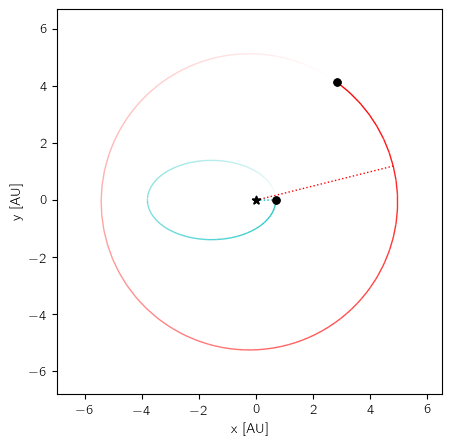

In [87]:
%matplotlib inline
op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

In [88]:
# Convert the orbital period in yrs
ref_period = (sim.particles[1].P / (2*np.pi))
print(f'Jupiter period wrt Earth: {ref_period} yrs')

# Integrating
sim.integrate(tmax=20*ref_period, exact_finish_time=0)

Jupiter period wrt Earth: 11.859711799506261 yrs


In [89]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.3.2
REBOUND built on:    	Feb 19 2024 16:10:01
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	2.3846913966547714e+02
Current timestep:    	1.023285
---------------------------------
<rebound.particle.Particle object at 0x7f32795b59c0, m=0.9999999999950272 x=0.0032042354119211957 y=-0.003909662096017602 z=-5.5448857845109945e-05 vx=0.00032875780149187845 vy=0.0002459267690130707 vz=-8.376949333585451e-06>
<rebound.particle.Particle object at 0x7f32795b4b40, m=0.0009547919099366768 x=-3.3559515728592344 y=4.0947792448906055 z=0.05807428536811934 vx=-0.344324033403307 vy=-0.2575710649121001 vz=0.008773586418531099>
<rebound.particle.Particle object at 0x7f32795b59c0, m=0.0 x=-3.5147451582987563 y=-0.853729508459411 z=-0.48642933859804954 vx=0.24975820868711618 vy=-0.204397148171346 vz=-0.11818433477231852>
---------------------------------


In [90]:
# Load the data
data = rebound.Simulationarchive("/Net/Groups/BGI/scratch/ppandey/REBOUND/ias15_sun_jupiter_tp.bin")

eccentricity = []
time_period = []
semi_major_axis = []
inclination = []
time_steps = []

# Save the evolution of orbital elements
for i, sim in enumerate(data):
    eccentricity.append(sim.particles[2].orbit(primary=sim.particles[0]).e)
    time_period.append(sim.particles[2].orbit(primary=sim.particles[0]).P)
    semi_major_axis.append(sim.particles[2].orbit(primary=sim.particles[0]).a)
    inclination.append(sim.particles[2].orbit(primary=sim.particles[0]).inc)
    time_steps.append(np.log(data[i].t))

/tmp/ipykernel_474555/224419097.py:16: RuntimeWarning: divide by zero encountered in log
  time_steps.append(np.log(data[i].t))


Text(0, 0.5, 'eccentricity')

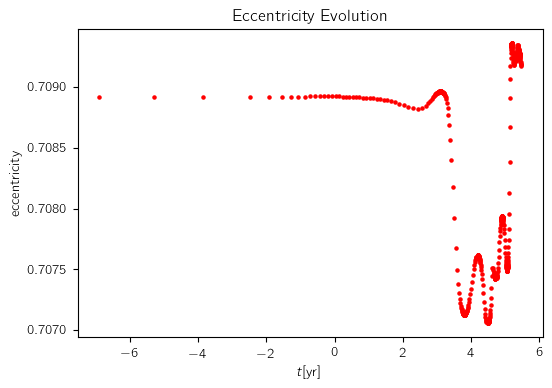

In [92]:
plt.figure(figsize=(6, 4))
plt.scatter(time_steps, eccentricity, s=5, c='red')
plt.title(r'Eccentricity Evolution')
plt.xlabel(r'$t$[yr]')
plt.ylabel(r'eccentricity')

Text(0.5, 0, '$t$[yr]')

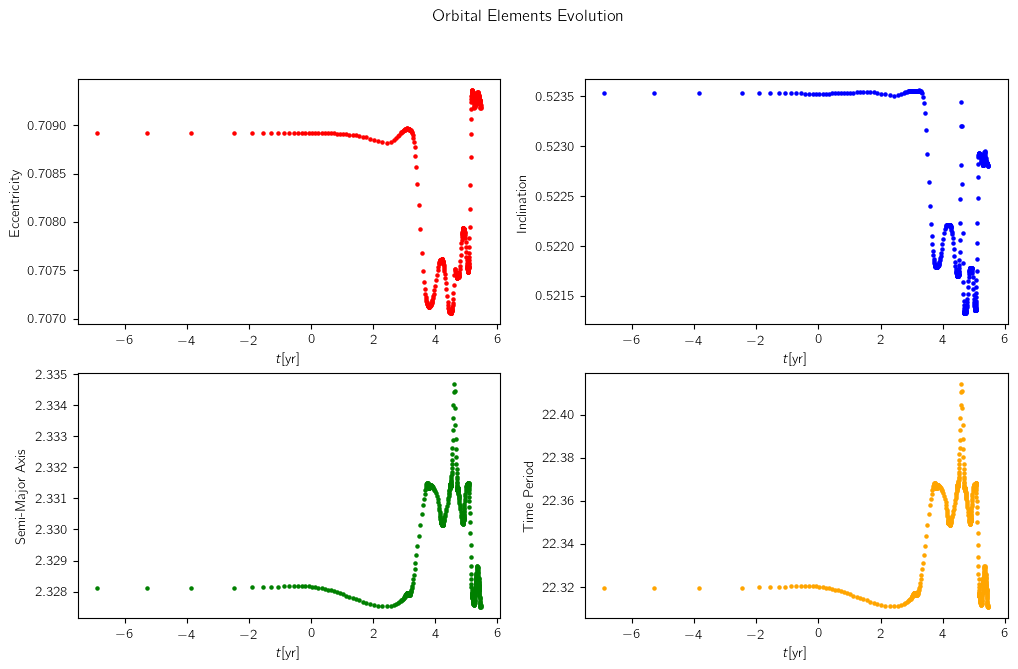

In [98]:
# Evolution Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig.suptitle(r'Orbital Elements Evolution')

axes[0,0].scatter(time_steps, eccentricity, s=5, c='red')
axes[0,0].set_ylabel(r'Eccentricity')
axes[0,0].set_xlabel(r'$t$[yr]')

axes[0,1].scatter(time_steps, inclination, s=5, c='blue')
axes[0,1].set_ylabel(r'Inclination')
axes[0,1].set_xlabel(r'$t$[yr]')

axes[1,0].scatter(time_steps, semi_major_axis, s=5, c='green')
axes[1,0].set_ylabel(r'Semi-Major Axis')
axes[1,0].set_xlabel(r'$t$[yr]')

axes[1,1].scatter(time_steps, time_period, s=5, c='orange')
axes[1,1].set_ylabel(r'Time Period')
axes[1,1].set_xlabel(r'$t$[yr]')